In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

## Chapter 1 : Thresholding

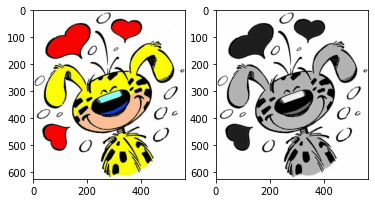

In [2]:
image = plt.imread("marsupilami.jpg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(gray,cmap="gray")

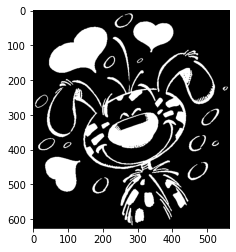

In [3]:
gray = 255 -gray
_,thresholdImage = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(thresholdImage, cmap="gray")


## Chapter 2 : The Basic One

In [4]:
structureElement = np.array([ [ 0, 0, 1, 0, 0],
                              [ 0, 1, 1, 1, 0],
                              [ 1, 1, 1, 1, 1],
                              [ 0, 1, 1, 1, 0],
                              [ 0, 0, 1, 0, 0]], dtype=np.uint8)

##### note : variabel example di bawah cuman buat ngetes aja

In [5]:
example = np.array([[ 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                    [ 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                    [ 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                    [ 0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0],
                    [ 0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0],
                    [ 0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0],
                    [ 0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0],
                    [ 0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0],
                    [ 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                    [ 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                    [ 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=np.uint8)

In [6]:
def erosion(img, kernel):
     n = int ((len(kernel)-1)/2)
     result = np.zeros((img.shape))
     for i in range(img.shape[0]):
          for j in range(img.shape[1]):
               check = 0
               if img[i,j] == 255:
                    for k in range(kernel.shape[0]):
                         for l in range(kernel.shape[1]):
                              if img[i+k-n][j+l-n] == 0:
                                   if kernel[k,l] == 1:
                                        result[i,j] = 0
                              else:
                                   if kernel[k,l] == 1:
                                        check += 1
               if check == np.sum(kernel):
                    result[i,j] = 255
     return result

def dilation(img, kernel):
     n = int ((len(kernel)-1)/2)
     result = np.zeros((img.shape))
     for i in range(img.shape[0]):
          for j in range(img.shape[1]):
               if img[i,j] == 255:
                    for k in range(kernel.shape[0]):
                         for l in range(kernel.shape[1]):
                              if kernel [k,l] == 1:
                                   result[i+k-n][j+l-n] = 255
     return result

In [7]:
def opening(img, kernel):
     result = erosion(img,kernel)
     result = dilation(result,kernel)
     return result

def closing(img, kernel):
     result = dilation(img,kernel)
     result = erosion(result,kernel)
     return result


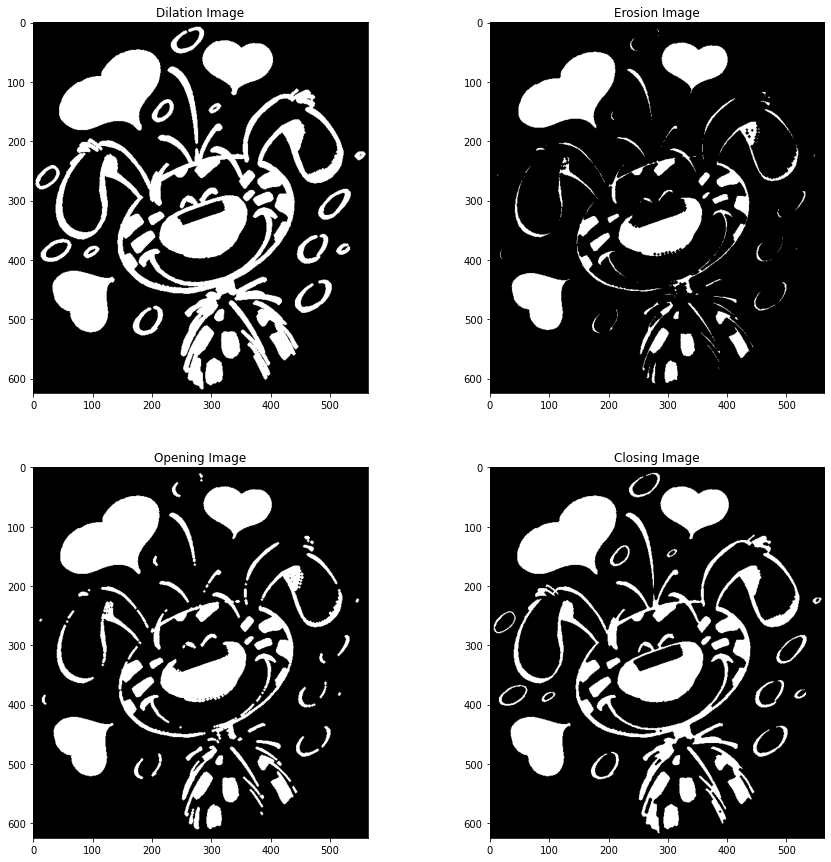

In [8]:
dilationImage = dilation(thresholdImage, structureElement)
erosionImage = erosion(thresholdImage, structureElement)
openingImage = opening(thresholdImage, structureElement)
closingImage = closing(thresholdImage, structureElement)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Dilation Image")
plt.imshow(dilationImage,cmap="gray")
plt.subplot(2,2,2)
plt.title("Erosion Image")
plt.imshow(erosionImage,cmap="gray")
plt.subplot(2,2,3)
plt.title("Opening Image")
plt.imshow(openingImage,cmap="gray")
plt.subplot(2,2,4)
plt.title("Closing Image")
plt.imshow(closingImage,cmap="gray")

## Chapter 3 : Special For You

In [9]:
def Gradient_Morph(dilasi,erosi):
    erosi = 255 - erosi
    result = np.zeros(dilasi.shape)
    for i in range (dilasi.shape[0]):
        for j in range (dilasi.shape[1]):
            if dilasi[i,j] == erosi[i,j]:
                result[i,j] = 255
    return result

In [10]:
def skeleton(img):
    size = np.size(img)
    result = np.zeros(img.shape, np.uint8)
    element = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))
    done = False

    while not done:
        eroded = erosion(img, element)
        temp = dilation(eroded, element)
        temp = img - temp
        temp = temp.astype(np.uint8)
        result = cv.bitwise_or(result, temp)
        img = eroded.copy()
        
        zeros = size - cv.countNonZero(img)
        if zeros == size:
            done = True
    return result

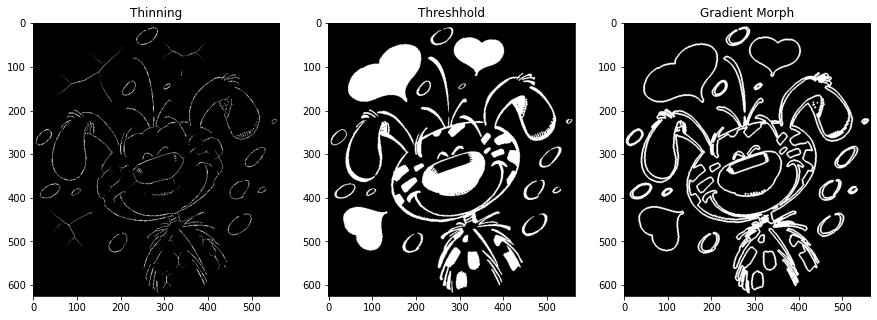

In [11]:
test = skeleton(thresholdImage)
test2 =  Gradient_Morph(dilationImage,erosionImage)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title("Thinning")
plt.imshow(test,cmap="gray")
plt.subplot(1,3,2)
plt.title("Threshhold")
plt.imshow(thresholdImage,cmap="gray")
plt.subplot(1,3,3)
plt.title("Gradient Morph")
plt.imshow(test2,cmap="gray")